# matplotlib创建图表

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
from datetime import datetime

np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))

np.set_printoptions(precision=4)

get_ipython().magic(u'matplotlib inline')
get_ipython().magic(u'pwd')

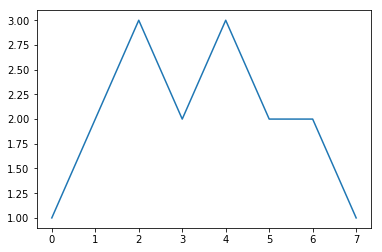

In [2]:
plt.plot([1, 2, 3, 2, 3, 2, 2, 1])
plt.show()

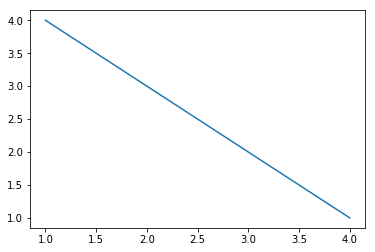

In [3]:
plt.plot([4, 3, 2, 1], [1, 2, 3, 4])
plt.show()

# 更多简单的图形

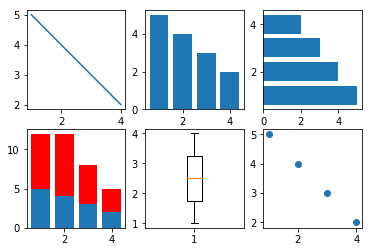

In [4]:
# 更多简单的图形
x = [1, 2, 3, 4]
y = [5, 4, 3, 2]

plt.figure()

plt.subplot(2, 3, 1)
plt.plot(x, y)

plt.subplot(232)
plt.bar(x, y)

plt.subplot(233)
plt.barh(x, y)

plt.subplot(234)
plt.bar(x, y)
y1 = [7, 8, 5, 3]
plt.bar(x, y1, bottom=y, color='r')

plt.subplot(235)
plt.boxplot(x)

plt.subplot(236)
plt.scatter(x, y)

plt.show()

# figure与subplot

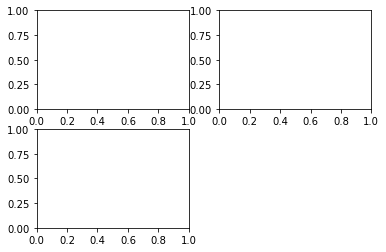

In [5]:
# figure对象
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.show()

plt.plot(randn(50).cumsum(), 'k--')
fig.show()

_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [18]:
plt.close('all')

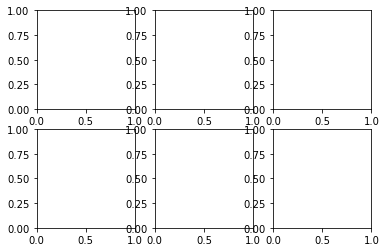

In [15]:
fig, axes = plt.subplots(2, 3)

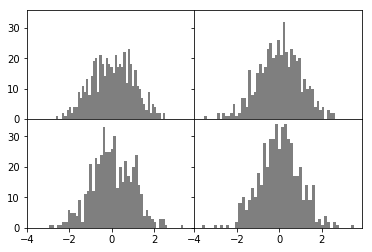

In [16]:
# 调整subplot周围的间距
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# matplotlib基本设置

## 颜色、标记和线型

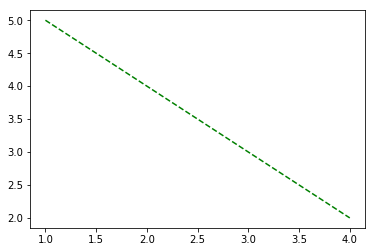

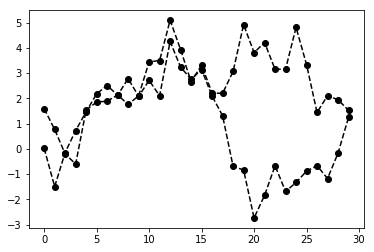

In [19]:
plt.figure()
plt.show()

plt.plot(x, y, linestyle='--', color='g')
plt.show()

plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')


In [20]:
plt.close('all')

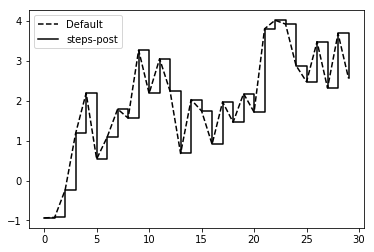

In [21]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 设置标题、轴标签、刻度以及刻度标签

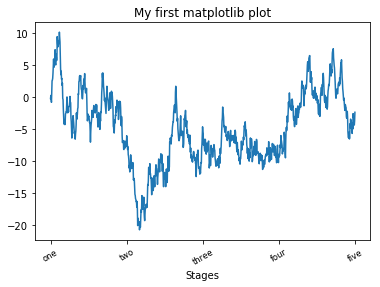

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

## 添加图例

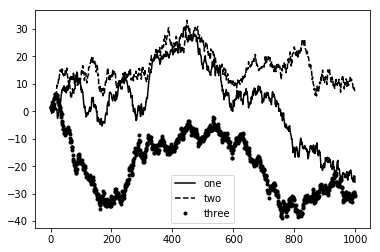

In [9]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

# 注释以及在subplot上绘图

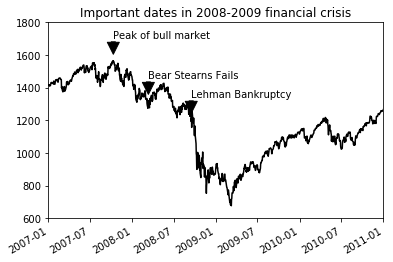

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

# 画图形

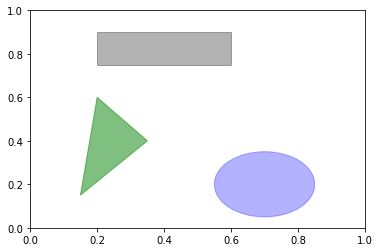

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 图表的保存

In [17]:
# 图表的保存
fig.savefig('data/figpath.svg')

fig.savefig('data/figpath.png', dpi=400, bbox_inches='tight')


# pandas中的绘图函数

## 线图

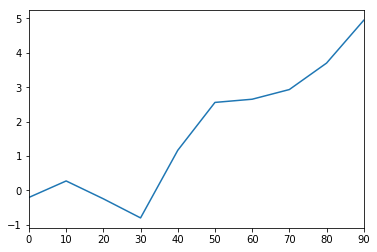

In [18]:
plt.close('all')

s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

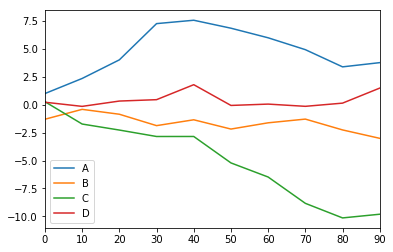

In [19]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

## 柱形图

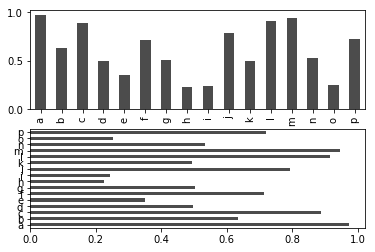

In [20]:
# 柱形图
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

Genus         A         B         C         D
one    0.367439  0.498648  0.226575  0.353566
two    0.650852  0.312933  0.768735  0.781837
three  0.852409  0.949906  0.107323  0.910725
four   0.336055  0.826380  0.898101  0.042715
five   0.195795  0.294501  0.627000  0.086223
six    0.142945  0.515827  0.689341  0.856626


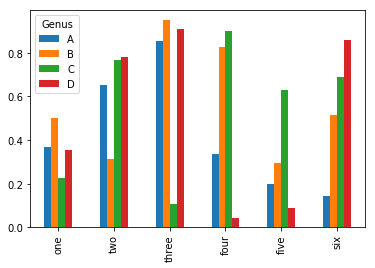

In [21]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)
df.plot(kind='bar')

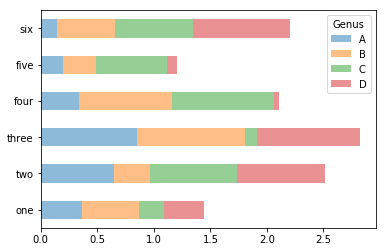

In [22]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [23]:
tips = pd.read_csv('data/tips.csv')
party_counts = pd.crosstab(tips.day, tips['size'])
print(party_counts)

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3


In [24]:
party_counts = party_counts.loc[:, 2:5]

party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
print(party_pcts)

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241


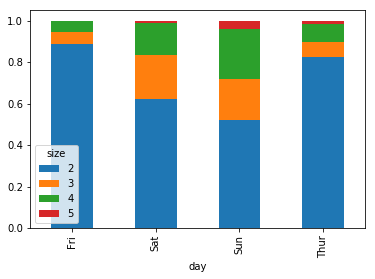

In [25]:
party_pcts.plot(kind='bar', stacked=True)

# 直方图和密度图

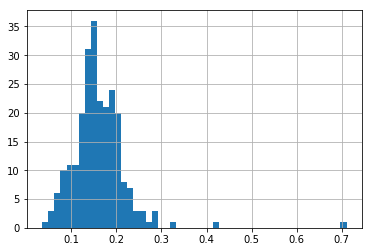

In [26]:
plt.figure()

tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

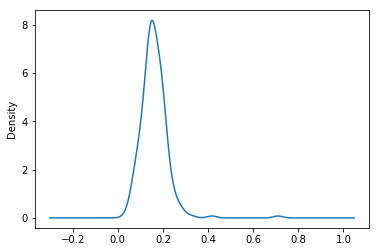

In [27]:
plt.figure()

tips['tip_pct'].plot(kind='kde')

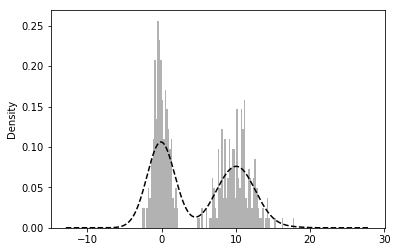

In [28]:
plt.figure()

comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')


## 散点图

In [29]:
# 散点图
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


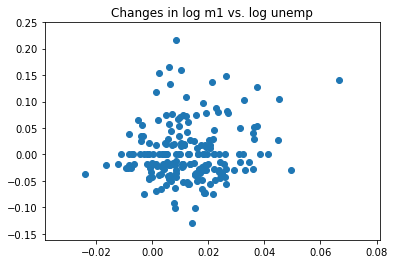

In [30]:
plt.figure()

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [35]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
plt.show()

![scatter_matrix](data/scatter_matrix.png)

# Matplotlib作图

## 误差条形图

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


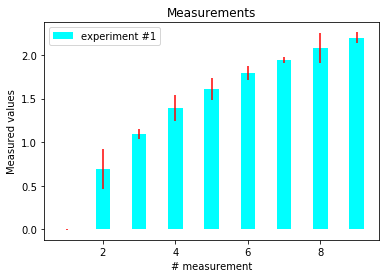

In [38]:
# 误差条形图
x = np.arange(0, 10, 1)

y = np.log(x)

xe = 0.1 * np.abs(np.random.randn(len(y)))

plt.bar(x, y, yerr=xe, width=0.4, align='center', ecolor='r', color='cyan',
        label='experiment #1')

plt.xlabel('# measurement')
plt.ylabel('Measured values')
plt.title('Measurements')
plt.legend(loc='upper left')

plt.show()

## 饼图

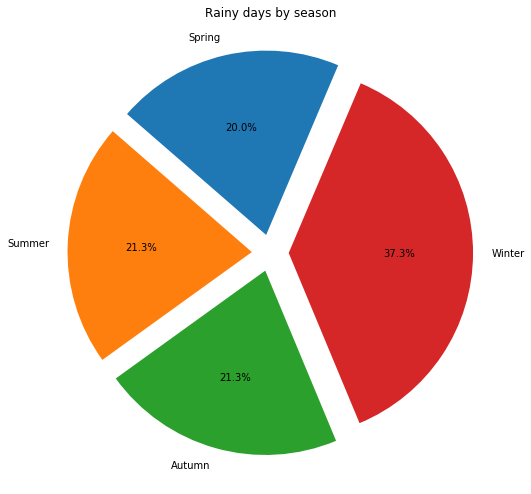

In [37]:
# 饼图
plt.figure(1, figsize=(8, 8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

labels = 'Spring', 'Summer', 'Autumn', 'Winter'
values = [15, 16, 16, 28]
explode = [0.1, 0.1, 0.1, 0.1]

plt.pie(values, explode=explode, labels=labels,
        autopct='%1.1f%%', startangle=67)

plt.title('Rainy days by season')

plt.show()

## 等高线图

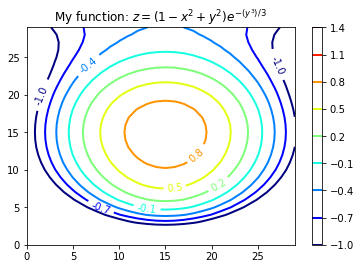

In [39]:
# 等高线图
import matplotlib as mpl


def process_signals(x, y):
    return (1 - (x ** 2 + y ** 2)) * np.exp(-y ** 3 / 3)


x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)

X, Y = np.meshgrid(x, y)

Z = process_signals(X, Y)

N = np.arange(-1, 1.5, 0.3)

CS = plt.contour(Z, N, linewidths=2, cmap=mpl.cm.jet)
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(CS)

plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

# 3D图像

## 3d柱形图

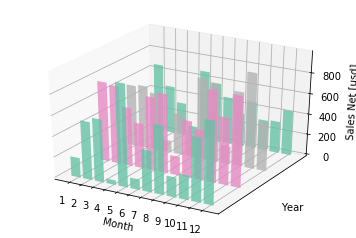

In [40]:
# 3d柱形图
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['font.size'] = 10

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for z in [2011, 2012, 2013, 2014]:
    xs = range(1, 13)
    ys = 1000 * np.random.rand(12)

    color = plt.cm.Set2(np.random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))

ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

# 3d直方图

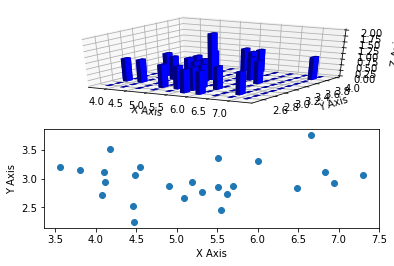

In [41]:
# 3d直方图
mpl.rcParams['font.size'] = 10

samples = 25

x = np.random.normal(5, 1, samples)
y = np.random.normal(3, .5, samples)

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=10)

elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1] + .25, yedges[:-1] + .25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

dx = .1 * np.ones_like(zpos)
dy = dx.copy()

dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.4)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

ax2 = fig.add_subplot(212)
ax2.scatter(x, y)
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

plt.show()

参考资料：炼数成金Python数据分析课程